In [1]:
import Pkg
Pkg.activate(".")

  Activating new project at `~/Documents/programming/BME-574-2024/DATA`


In [3]:
Pkg.add(["Random","LinearAlgebra","FFTW","Plots"])

   Resolving package versions...
   Installed Pango_jll ────── v1.54.1+0
   Installed fzf_jll ──────── v0.53.0+0
   Installed Opus_jll ─────── v1.3.3+0
   Installed JLFzf ────────── v0.1.8
   Installed libfdk_aac_jll ─ v2.0.3+0
   Installed Plots ────────── v1.40.8
   Installed HarfBuzz_jll ─── v8.3.1+0
   Installed XML2_jll ─────── v2.13.3+0
   Installed libass_jll ───── v0.15.2+0
    Updating `~/Documents/programming/BME-574-2024/DATA/Project.toml`
  [91a5bcdd] + Plots v1.40.8
    Updating `~/Documents/programming/BME-574-2024/DATA/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes v3.26.0
  [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.11
  [34da2185] + Compat v4.16.0
  [f0e56b4a] + ConcurrentUtilities v2.4.2
  [d38c429a] + Contour v0.6.3
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.20
  [8bb1440f] + DelimitedFiles v1.9.1
  [ffbed154] + DocStringExtensio

In [4]:
using FFTW, Plots

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]


In [5]:
dx = 0.001
L = π
x = (-1+dx:dx:1)*L

-3.1384510609362035:0.0031415926535897933:3.141592653589793

In [10]:
n = length(x)
nquart = Int64(floor(n/4))

500

In [44]:
f = zeros(n)
f[nquart:2*nquart] = 4 .* (1:nquart+1)/n
f[2*nquart+1:3*nquart] = 1 .- 4 .* (0:nquart-1)/n

1.0:-0.002:0.0020000000000000018

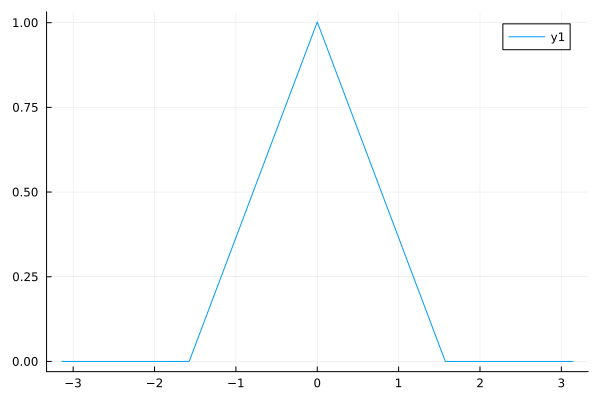

In [23]:
plot(x,f)

In [36]:
A0 = sum(f) * dx
A = zeros(20)
B = zeros(20)
#fFS = zeros(length(x))
fFS = A0/2
for k in 1:20
    A[k] = sum(f .* cos.(π .* k .* x/L)) * dx
    println(A[k])
    B[k] = sum(f .* sin.(π .* k .* x/L)) * dx
    println(B[k])
    fFS = fFS .+ A[k]*cos.(π * k .* x/L) .+ B[k]*sin.(π * k .* x/L)
end

0.4065583064003864
1.4210854715202004e-17
0.2026410339526582
-5.684341886080802e-17
0.04460756046920503
5.684341886080802e-17
2.0000000000253148e-6
4.263256414560601e-17
0.016466365393157475
-1.4210854715202004e-17
0.022514485265696528
7.105427357601002e-18
0.008089566340329592
7.105427357601002e-18
2.0000000000128803e-6
-7.105427357601002e-18
0.005145310223877237
-2.842170943040401e-17
0.008104361390953649
0.0
0.0032340564393945827
0.0
2.000000000001223e-6
3.552713678800501e-18
0.002496395774708087
-3.552713678800501e-18
0.004134225247166816
-3.552713678800501e-18
0.0017167319295514948
-7.105427357601002e-18
1.99999999999545e-6
-7.105427357601002e-18
0.0014775813452499078
-7.105427357601002e-18
0.0025004243940703755
0.0
0.001056013077970248
-3.552713678800501e-18
2.0000000000084393e-6
0.0


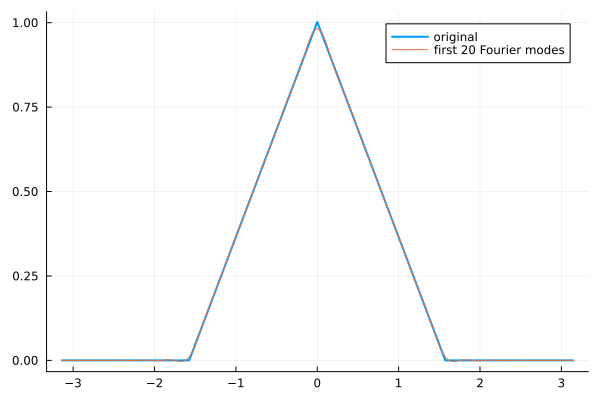

In [39]:
plot(x,f,linewidth = 2, label="original")
plot!(x,fFS,label="first 20 Fourier modes")

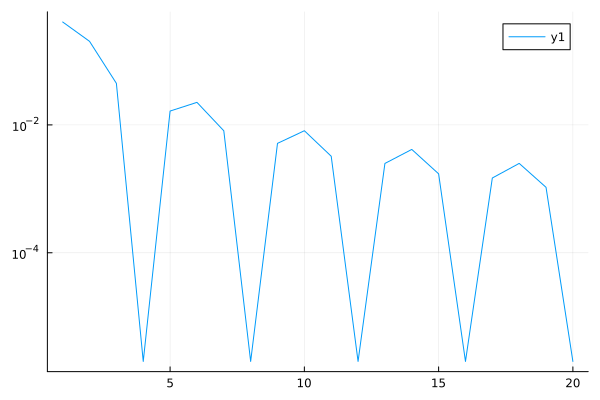

In [43]:
plot(A, yscale = :log10)

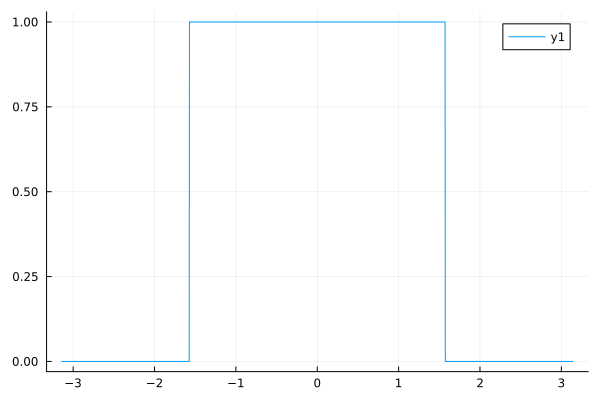

In [51]:
shf = zeros(n)
shf[nquart:3*nquart] .= 1
plot(x,shf)

In [54]:
m=100
A0 = sum(shf) * dx
A = zeros(m)
B = zeros(m)
#fFS = zeros(length(x))
fFS = A0/2
for k in 1:m
    A[k] = sum(shf .* cos.(π .* k .* x/L)) * dx
    println(A[k])
    B[k] = sum(shf .* sin.(π .* k .* x/L)) * dx
    println(B[k])
    fFS = fFS .+ A[k]*cos.(π * k .* x/L) .+ B[k]*sin.(π * k .* x/L)
end

0.6366192487687197
-5.684341886080802e-17
-0.000999999999999947
0.0
-0.21220501999054156
2.842170943040401e-17
0.000999999999999949
-2.447000935212884e-17
0.12732133646887214
0.0
-0.000999999999999981
-1.4210854715202004e-17
-0.09094201654582572
0.0
0.0009999999999999714
-6.696032617270476e-19
0.07073081781129531
-7.105427357601002e-18
-0.000999999999999967
0.0
-0.0578687650595173
0.0
0.0009999999999999575
2.1094237467877974e-18
0.04896394474726847
-1.0658141036401503e-17
-0.000999999999999955
0.0
-0.042433463885505555
0.0
0.0009999999999999467
4.260480856999038e-18
0.037439320301611886
-1.0658141036401503e-17
-0.0009999999999999484
-7.105427357601002e-18
-0.03349635484127791
-3.552713678800501e-18
0.000999999999999967
-4.3021142204224816e-19
0.030304230883592388
0.0
-0.0009999999999998148
1.4210854715202004e-17
-0.027667076717825864
-5.3290705182007515e-18
0.0010000000000000252
-8.881784197001253e-19
0.025451699579357147
3.552713678800501e-18
-0.0010000000000001154
-3.552713678800501e

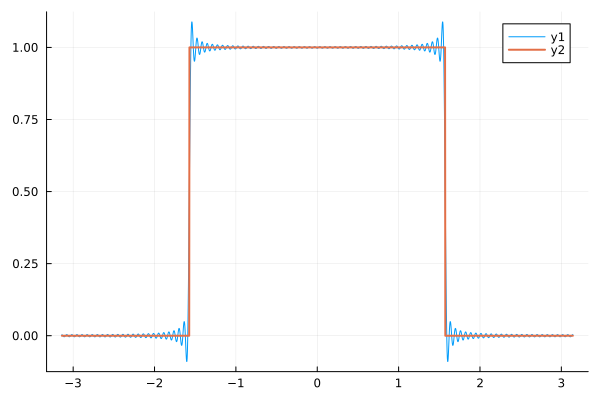

In [55]:
plot(x,fFS)
plot!(x,shf,linewidth=2)